Shape: (2930, 75)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,5,141.0,31770,1,0,3,0,0,0,...,0,0,0,0,0,5,2010,9,4,215000
1,20,4,80.0,11622,1,3,3,0,4,0,...,0,0,120,0,0,6,2010,9,4,105000
2,20,5,81.0,14267,1,0,3,0,0,0,...,0,0,0,0,12500,6,2010,9,4,172000
3,20,5,93.0,11160,1,3,3,0,0,0,...,0,0,0,0,0,4,2010,9,4,244000
4,60,5,74.0,13830,1,0,3,0,4,0,...,0,0,0,0,0,3,2010,9,4,189900


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,4.967235,69.019795,10147.921843,0.995904,1.940273,2.777816,0.001706,3.055290,0.053584,...,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,8.358703,3.779863,180796.060068
std,42.638025,0.865652,21.326422,7880.017759,0.063876,1.412105,0.703199,0.055406,1.603922,0.248304,...,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,1.877433,1.076299,79886.692357
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,12789.000000
25%,20.000000,5.000000,60.000000,7440.250000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,9.000000,4.000000,129500.000000
50%,50.000000,5.000000,68.000000,9436.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,9.000000,4.000000,160000.000000
75%,70.000000,5.000000,78.000000,11555.250000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,9.000000,4.000000,213500.000000
max,190.000000,6.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,2.000000,4.000000,2.000000,...,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,9.000000,5.000000,755000.000000


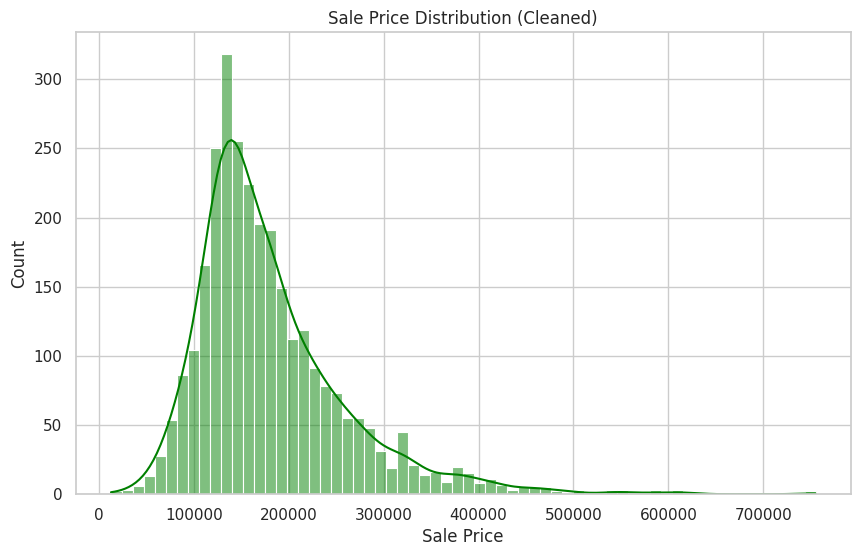

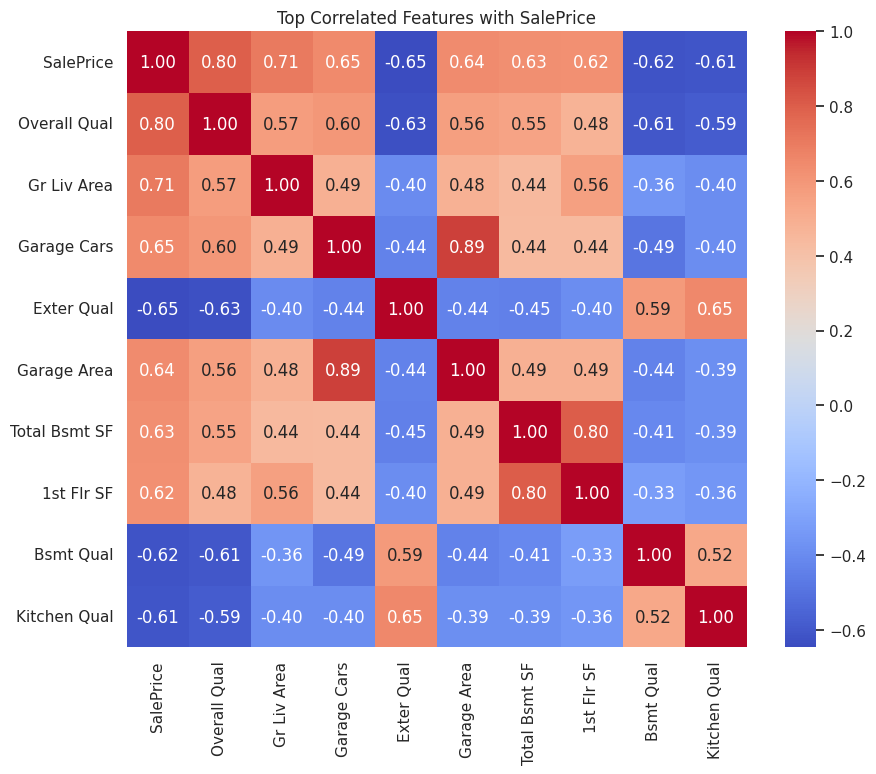

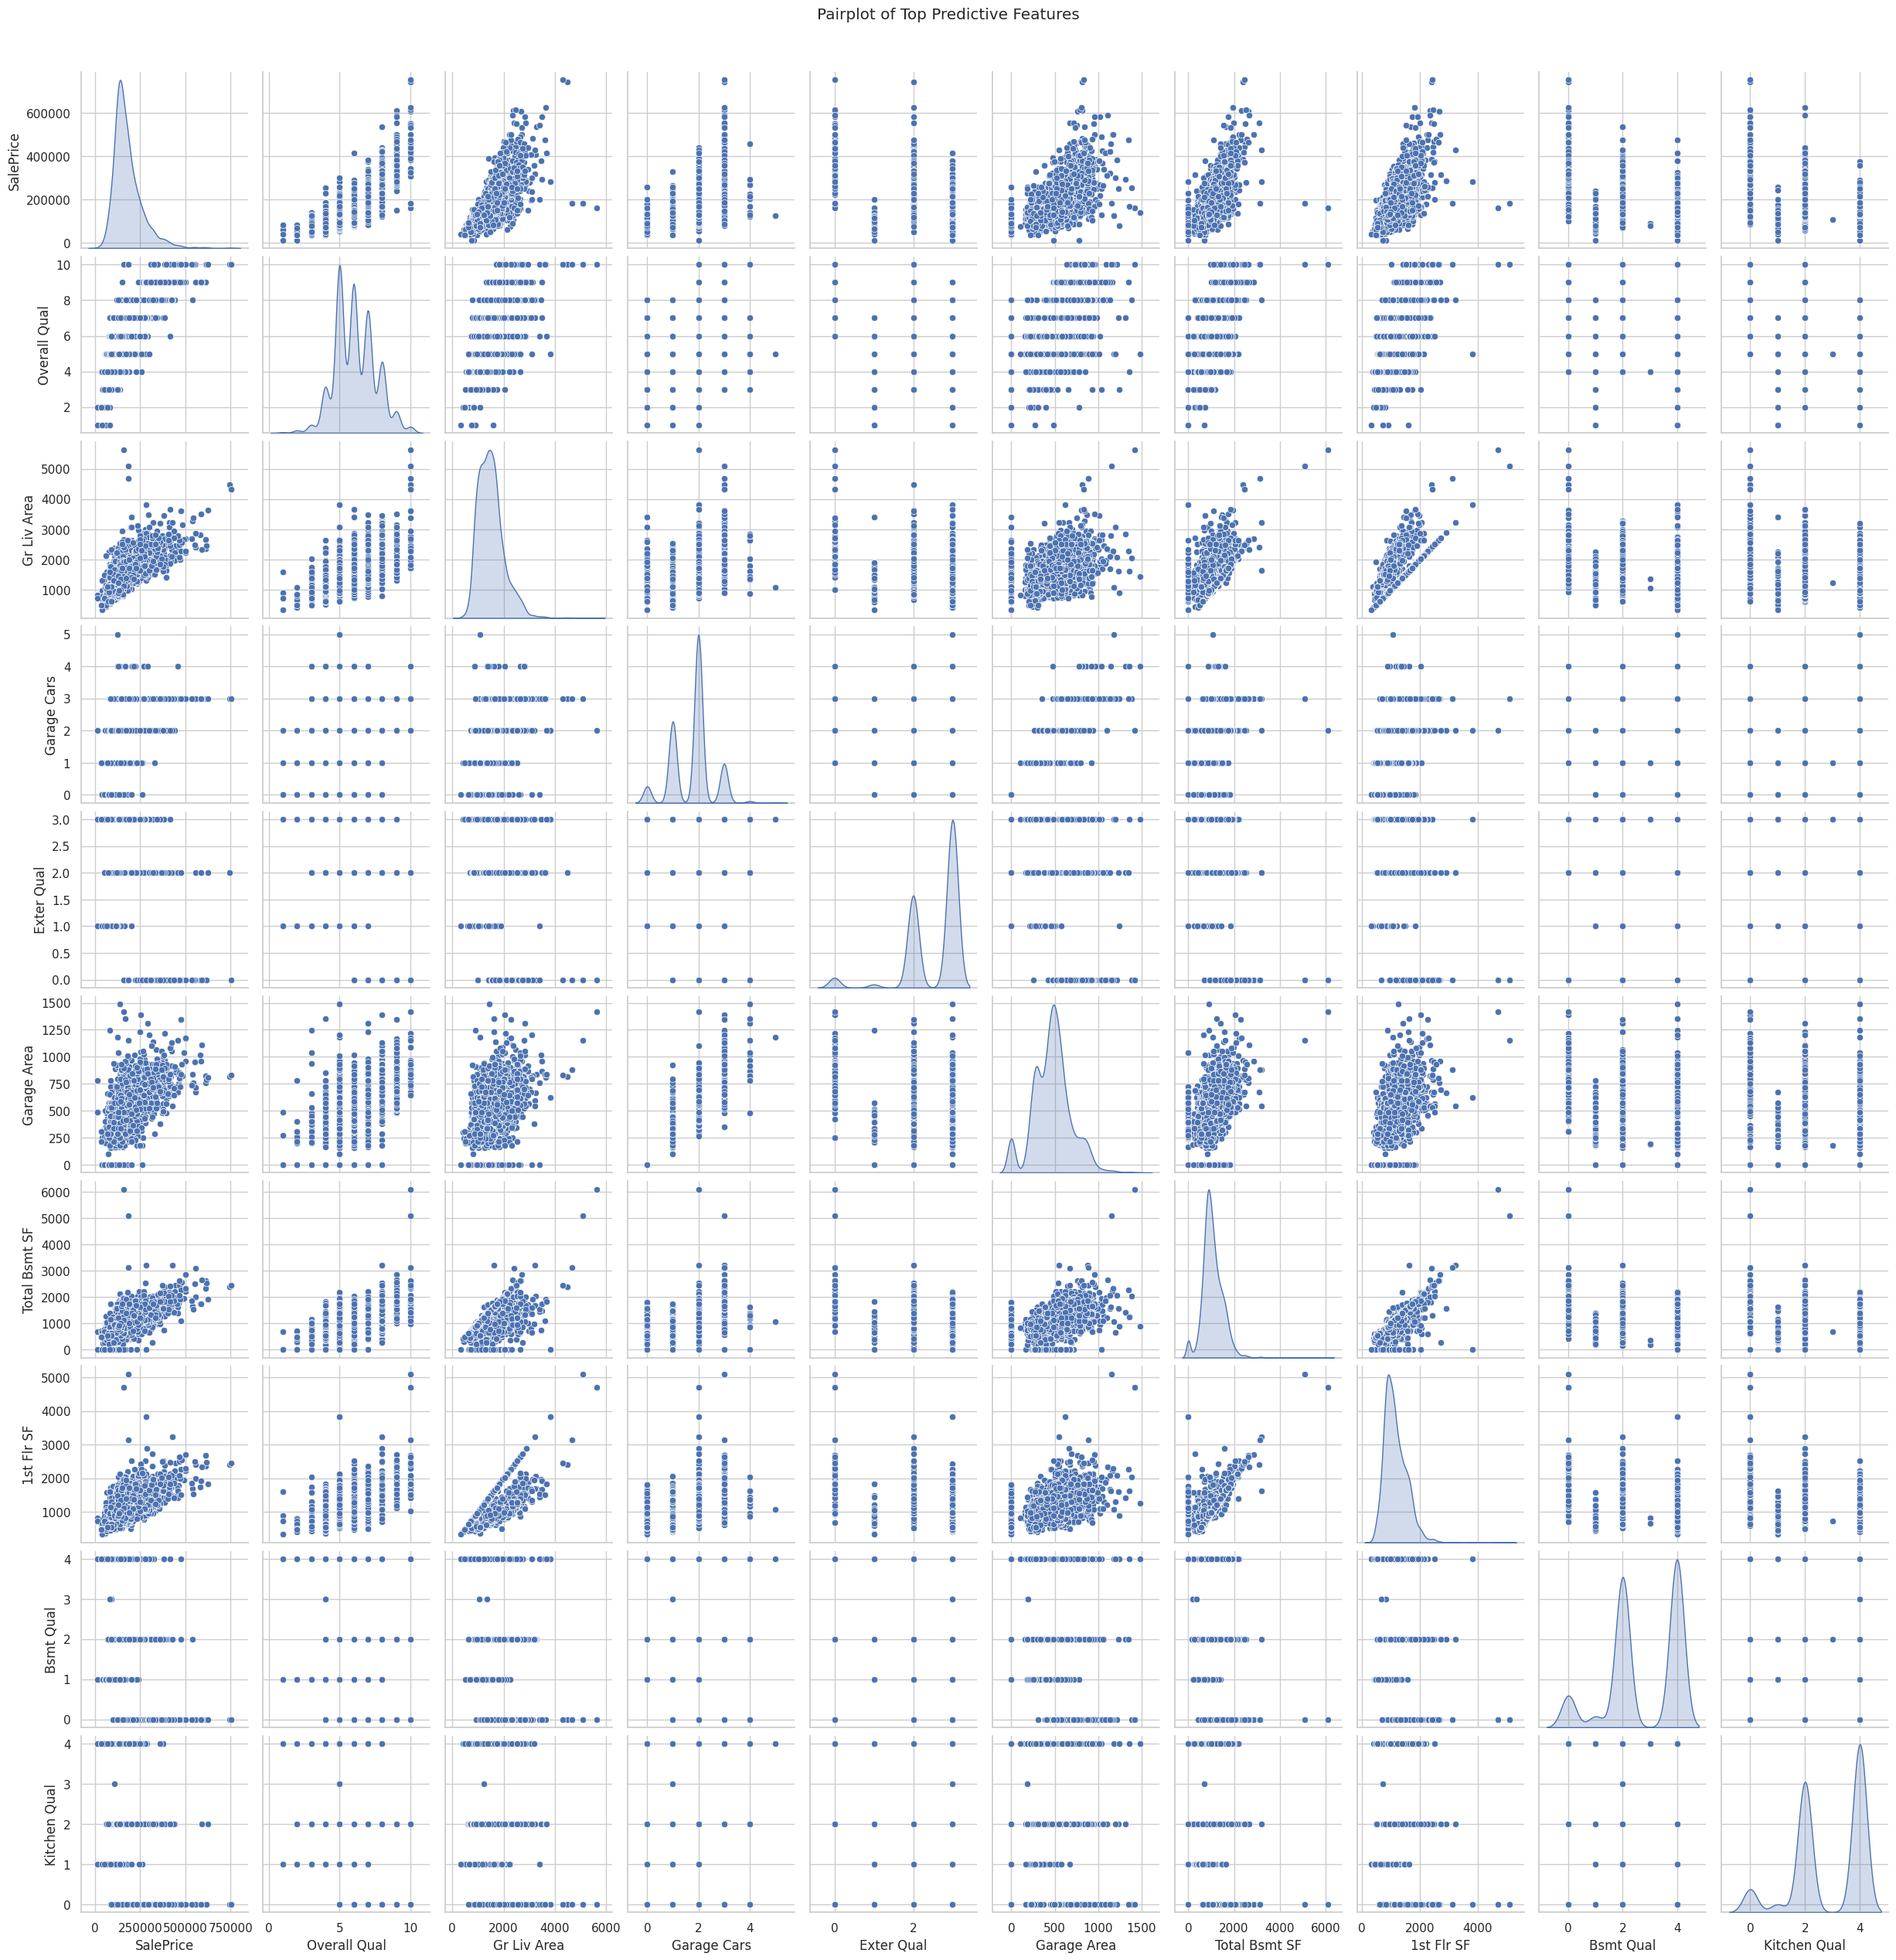

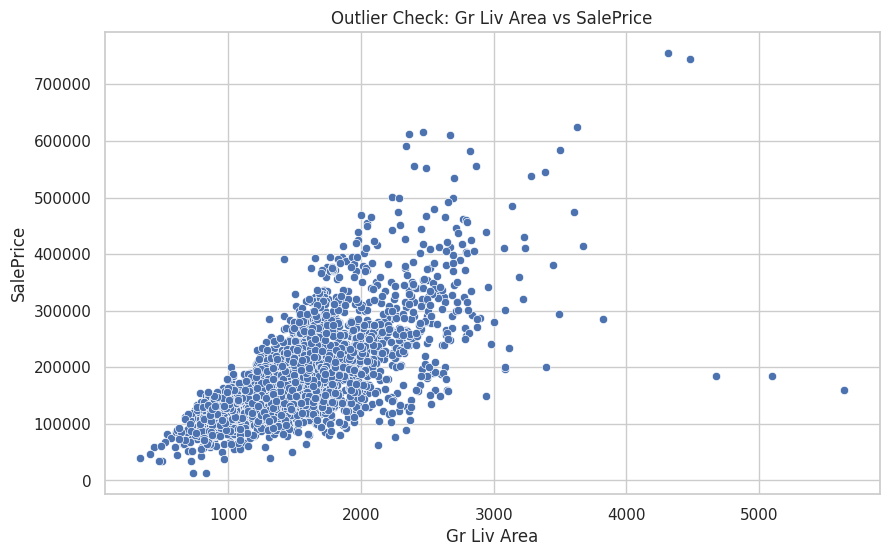

In [3]:
# EDA on Cleaned Ames Housing Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load cleaned data
df = pd.read_csv("cleaned.csv")

# Overview
print("Shape:", df.shape)
display(df.head())
display(df.describe())

# Target distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], kde=True, color='green')
plt.title("Sale Price Distribution (Cleaned)")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

# Correlation matrix
corr = df.corr(numeric_only=True)
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with SalePrice")
plt.show()

# Pairplot of top features
sns.pairplot(df[list(top_corr)], diag_kind="kde")
plt.suptitle("Pairplot of Top Predictive Features", y=1.02)
plt.show()

# Outlier detection: Gr Liv Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df)
plt.title("Outlier Check: Gr Liv Area vs SalePrice")
plt.show()
